# Over dit document
In dit document wordt een CRISP-DM cycles doorlopen, welke vervolgens een dataproduct (visualisaties) op zal leveren. Tot slot wordt er een conclusie getrokken en advies gegeven.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Business understanding
Het ziekenhuis Isala wil de zorg voor diabetespatiënten verbeteren. Het gaat hier specifiek om het behandelproces door onnauwkeurigheden in metingen te filteren en hierop te baseren of een behandelplan aangepast moet worden of niet. Visualisaties zullen helpen bij het verkrijgen van inzicht van diverse meetmethoden om vervolgens conclusies te kunnen trekken. Die zijn er nog niet. Daarbij zou een visualisatie van een voorspelling meer inzicht brengen in hoe de CV mogelijk zal veranderen per jaar. Dit zou kunnen resulteren in toekomstige plannen voor het standaardiseren van de HbA1c meetmethoden.

Om een voorspelling te realiseren & visualiseren wordt een liniare regressie gebruikt. Hier wordt gekeken naar alle data punten die beschikbaar zijn door de jaren heen en maakt hier een set van data die voorspellend is voor het volgend jaartal.

# Data understanding
Welke databronnen zijn gegeven en in welk formaat:
Een excel bestand genaamd: Complete-dataset-FINAL.xlsx
##### note
Het excel bestand dat gebruikt gaat worden, is het resultaat van rapporten die om zijn gezet naar excel. Dit is de meest recente versie waarin de meetmethoden zijn genormaliseerd en de waarden dubbelgecheckt zijn.

Hoe groot zijn deze databronnen:
355 kB

-4685 rijen

-12 kolommen


Kolomnamen: Method name, N (no. labs), Mean, Bias, CV, Sample, Reference value, Year, Source, Type, Manufacturer (fabrikant).

# Data preparation
De dataset wordt aangepast, zodat het bruikbaar is om tijdsreeksen mee te kunnen voorspellen. We focussen in dit notebook op de EURA1c source data.

In [3]:
df = pd.read_excel('Complete-dataset-FINAL.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          4684 non-null   object 
 1   N (no. labs)         4684 non-null   object 
 2   Mean                 4602 non-null   float64
 3   Bias                 4058 non-null   float64
 4   CV                   4584 non-null   float64
 5   Sample               4684 non-null   object 
 6   Reference Value      4656 non-null   float64
 7   Year                 4684 non-null   int64  
 8   Source (CAP/EurA1c)  4684 non-null   object 
 9   Type (Fresh/frozen)  4684 non-null   object 
 10  Manufacturer         4684 non-null   object 
 11  Total Error          4684 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 439.2+ KB


In [6]:
# Groupby Method name
manufacturer = df.dropna().groupby('Manufacturer')
# order manufacturer by size
manufacturerSizes = manufacturer.size().sort_values(ascending=False)
# Only show top more then 100 size
manufacturerSizes = manufacturerSizes[manufacturerSizes > 100]
# Make a new dataframe with the top manufacturers from df
df_manufacturer = df[df['Manufacturer'].isin(manufacturerSizes.index)]
df_manufacturer = df_manufacturer[df_manufacturer['Source (CAP/EurA1c)'] == 'EURA1c']
df_manufacturer = df_manufacturer[df_manufacturer['Manufacturer'] != 'Vitros']
df_manufacturer

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
73,Roche Diagnostics Cobas c513,10,8.92100,3.9,2.7,Sample 1,8.56415,2019,EURA1c,Frozen,Roche Diagnostics,9.192
74,Roche Diagnostics Cobas c513,10,5.86490,2.4,4.6,Sample 2,5.64530,2019,EURA1c,Frozen,Roche Diagnostics,11.416
75,Abbott Alinity,17,5.26100,-2.5,8.2,Sample 1,5.58125,2020,EURA1c,Frozen,Abbott,13.572
76,Abbott Alinity,15,5.27930,-2.3,8.2,Sample 2,5.58125,2020,EURA1c,Frozen,Abbott,13.772
77,Abbott Alinity,12,5.45315,-0.4,2.1,Sample 1,5.54465,2020,EURA1c,Fresh,Abbott,3.716
...,...,...,...,...,...,...,...,...,...,...,...,...
4540,Trinity Biotech Premier Hb9210,27,7.61255,1.8,4.0,Sample 2,7.44785,2016,EURA1c,Fresh,Trinity Biotech,9.640
4541,Trinity Biotech Premier Hb9210,20,6.26750,0.8,2.2,Sample 1,6.19430,2017,EURA1c,Frozen,Trinity Biotech,5.112
4542,Trinity Biotech Premier Hb9210,21,7.45700,0.0,2.4,Sample 2,7.45700,2017,EURA1c,Frozen,Trinity Biotech,4.704
4543,Trinity Biotech Premier Hb9210,29,6.29495,1.1,3.7,Sample 1,6.19430,2017,EURA1c,Fresh,Trinity Biotech,8.352


# Modeling
---
### EURA1c CV gemiddelde per jaar per merk

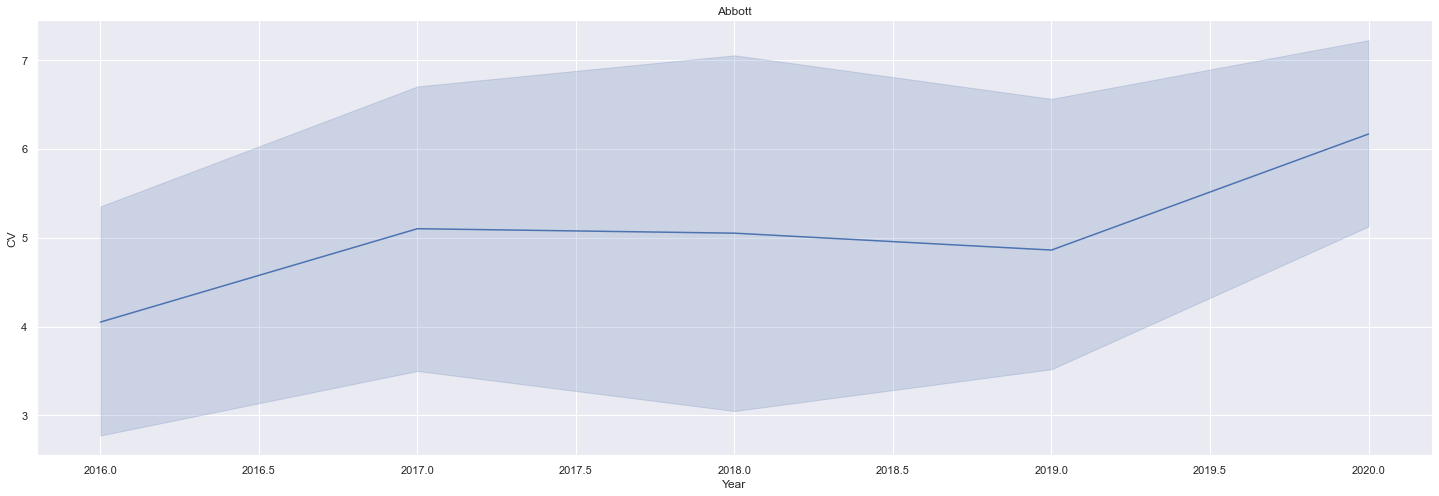

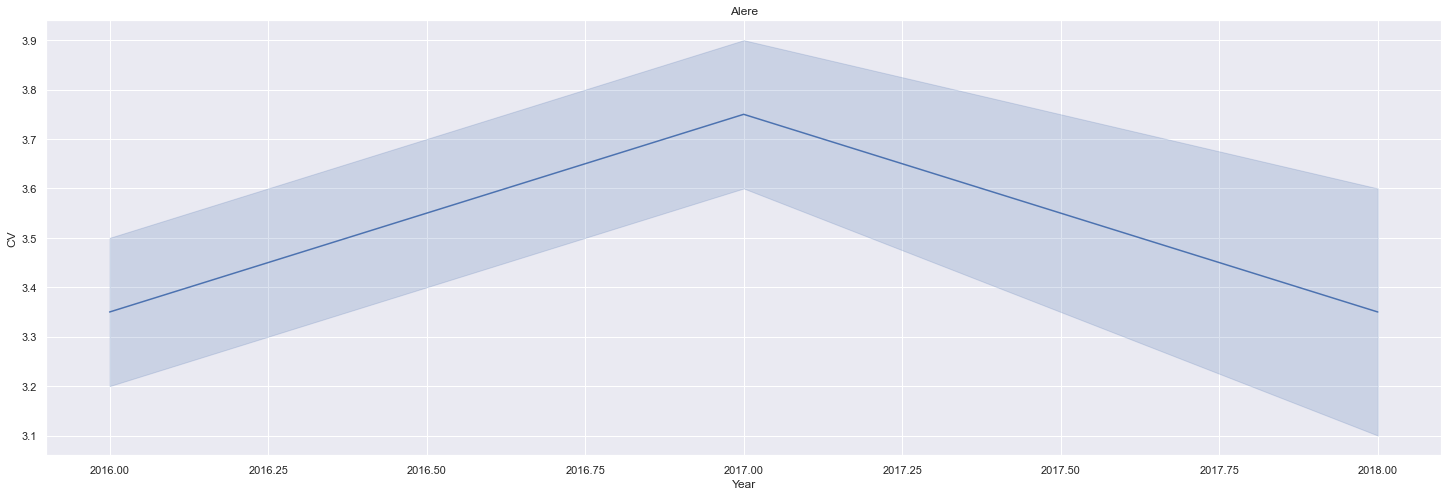

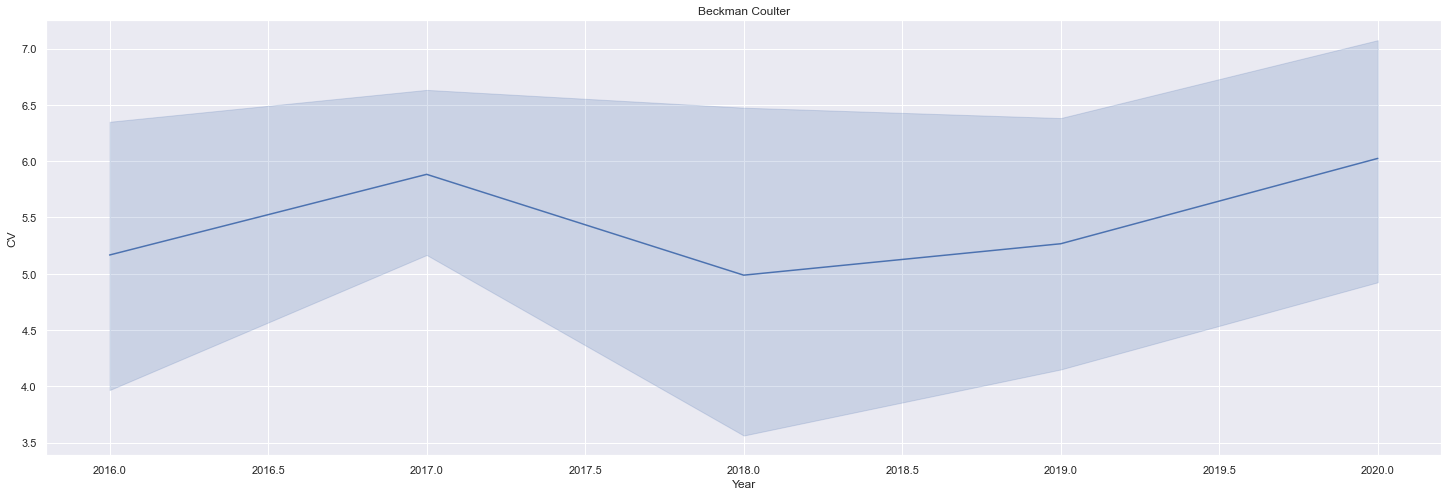

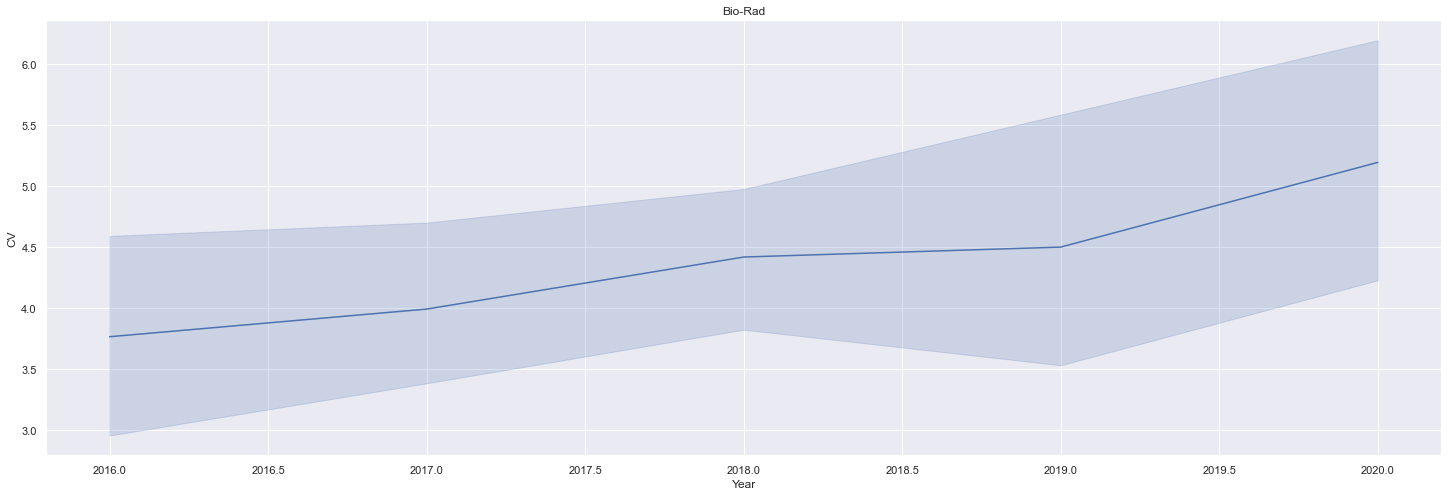

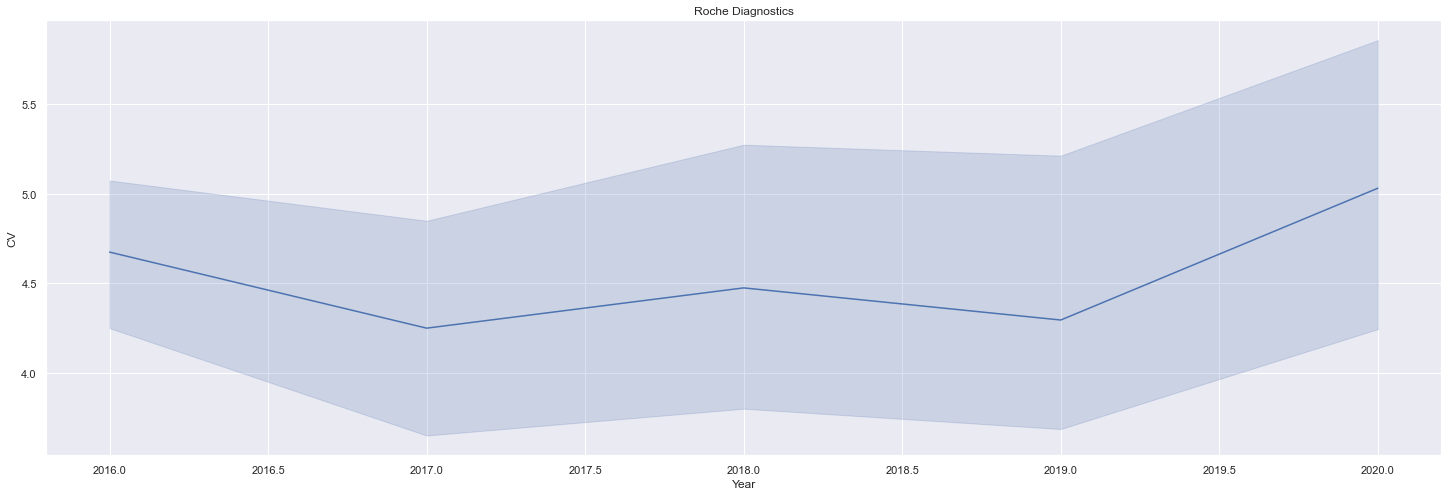

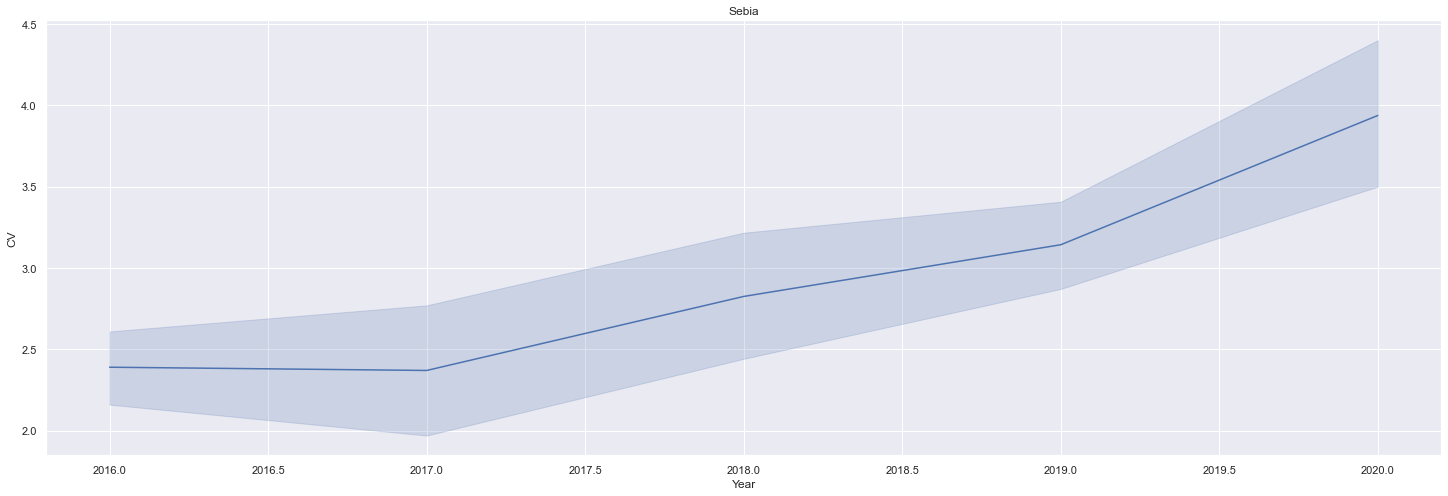

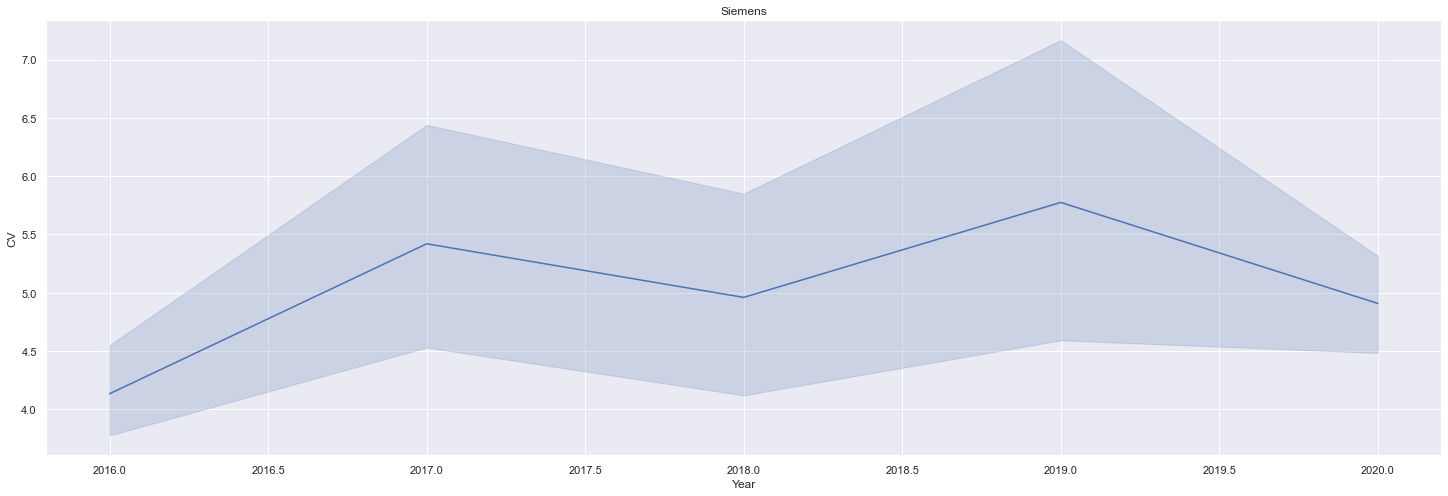

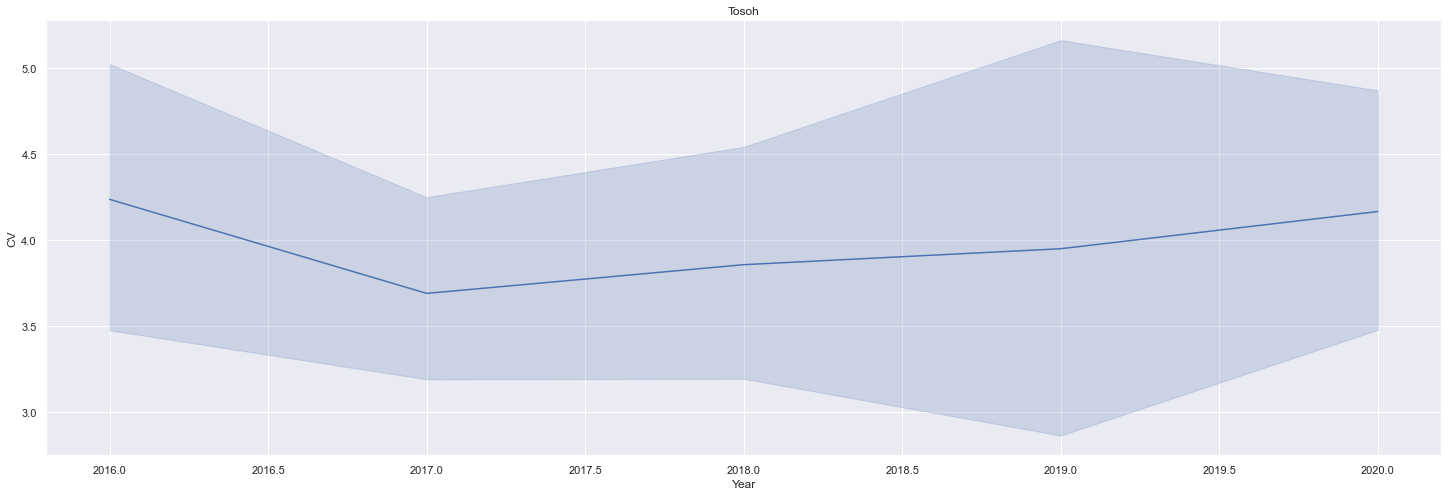

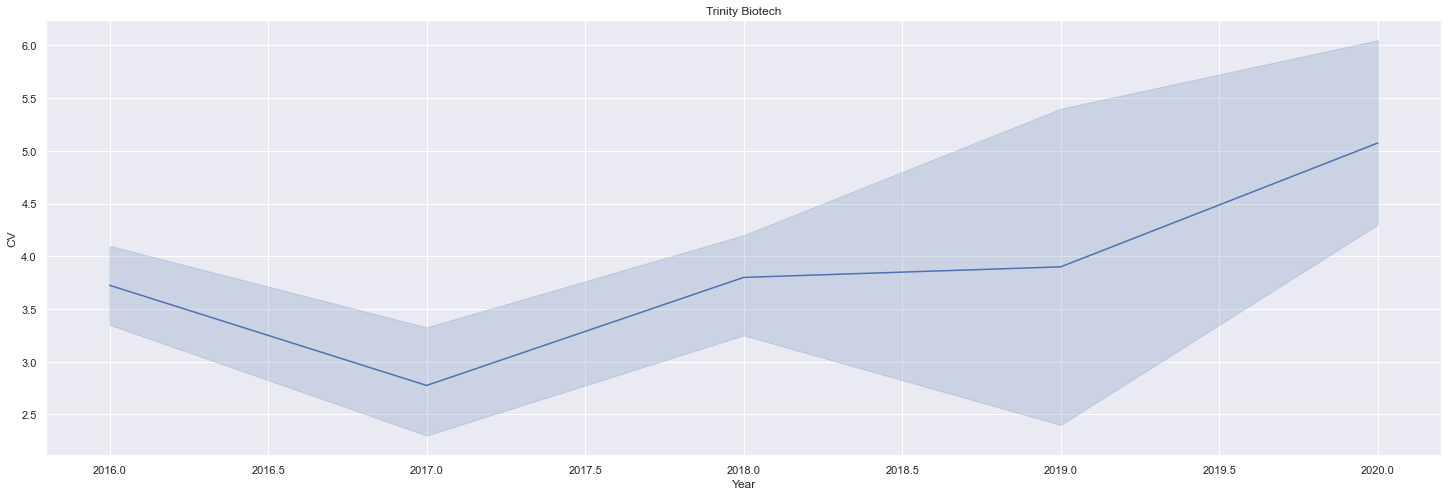

In [8]:
manufacturerGroups = df_manufacturer.groupby('Manufacturer')
# loop manufacturerGroups
for name, data in manufacturerGroups:
    # line plot for CV with seaborn
    sns.set(rc = {'figure.figsize':(25,8)})
    l = sns.lineplot(x='Year', y='CV', data=data)
    l.set_title(name)
    plt.show()
    

### EURA1c CV gemiddelde per jaar per merk met voorspelling 2022 m.b.v liniare regressie gesplitst per type

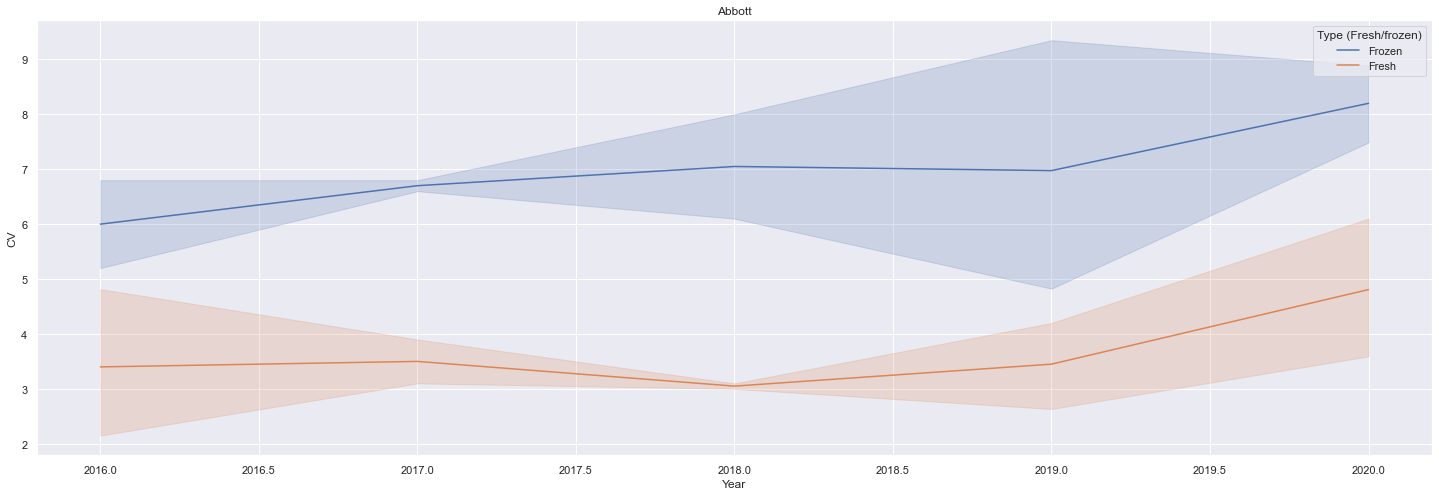

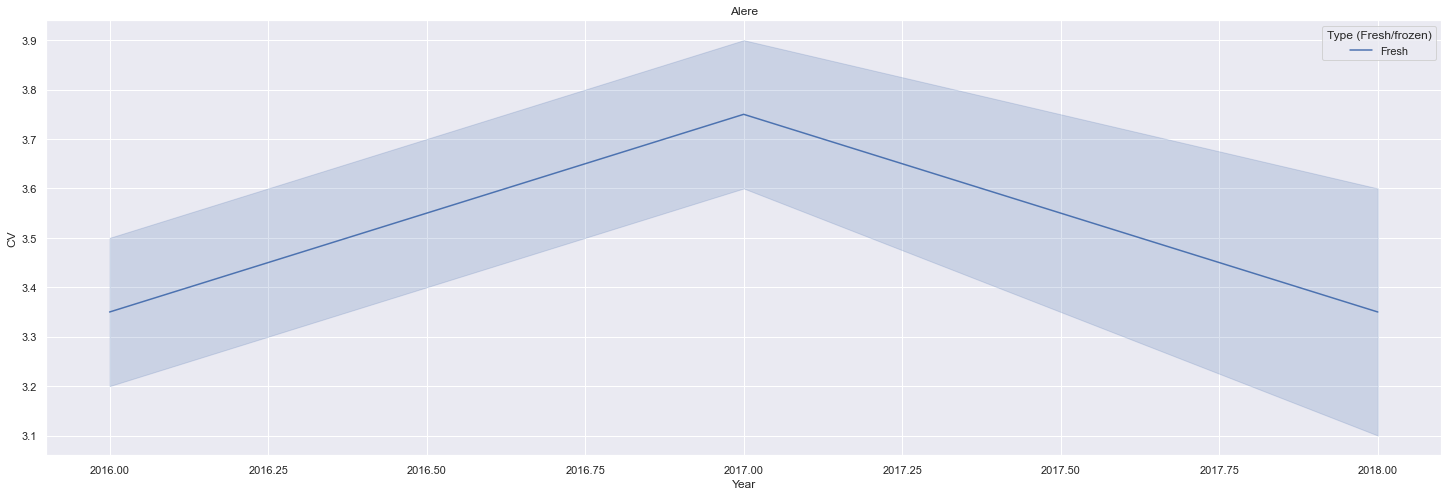

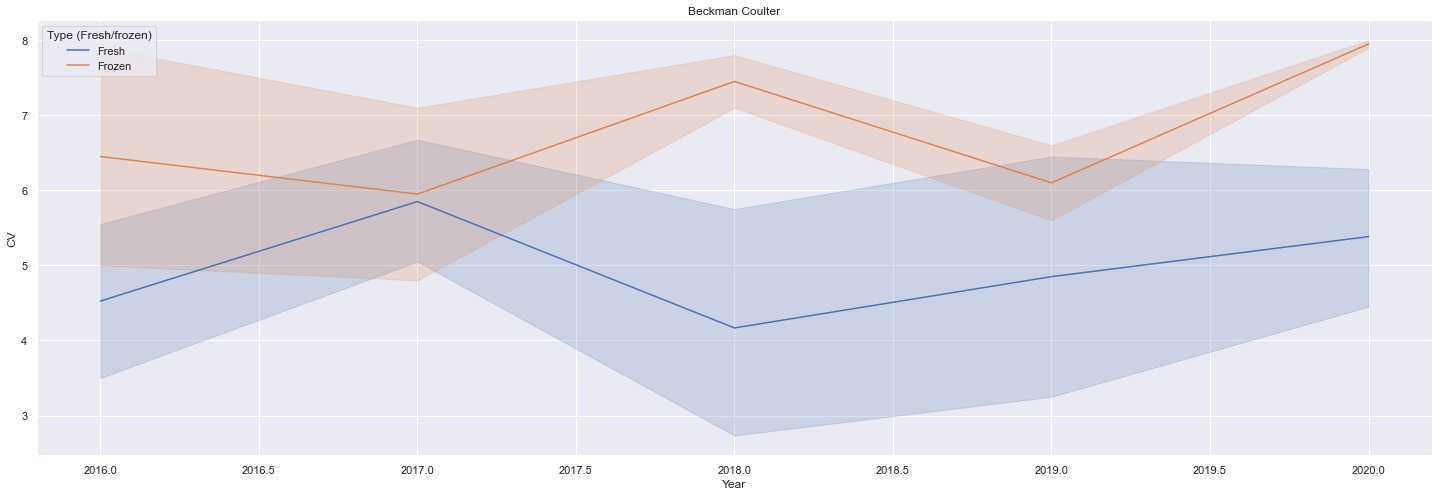

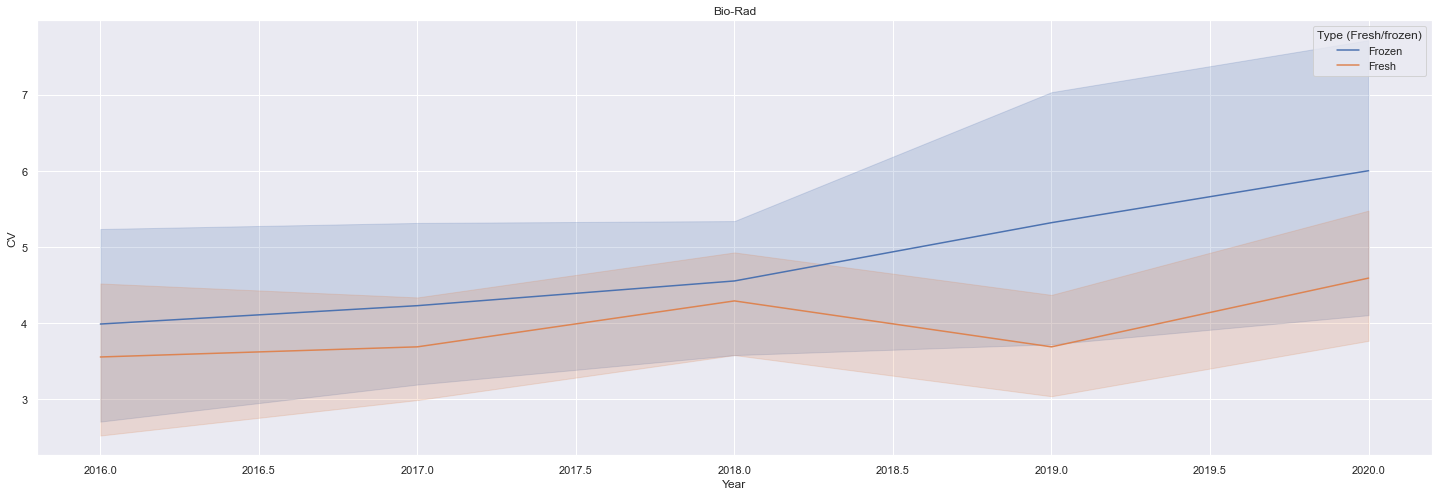

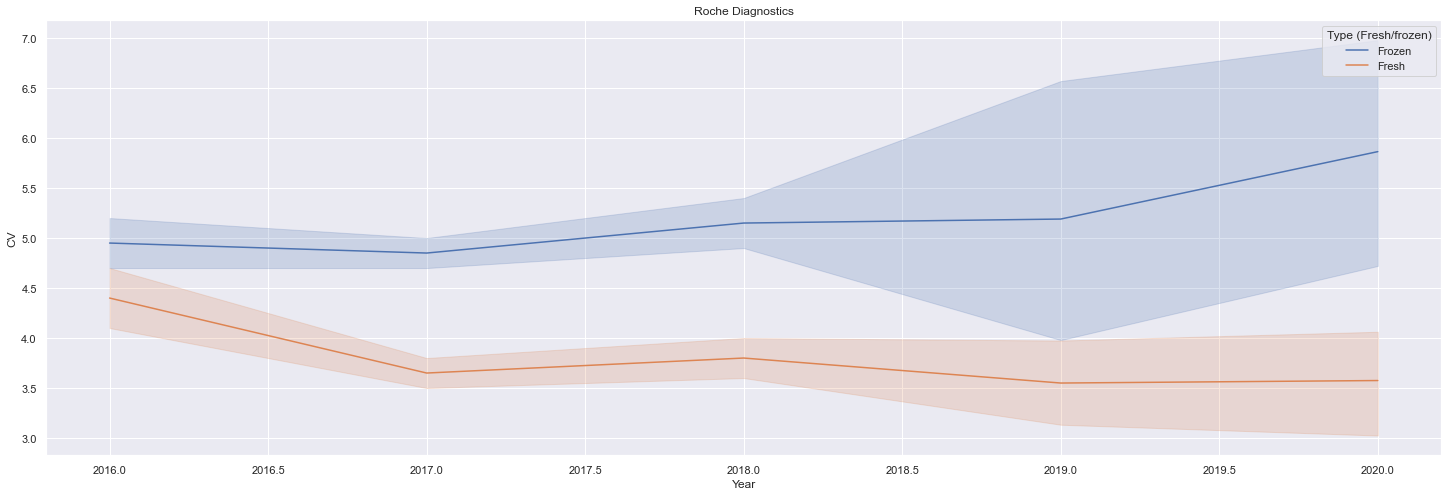

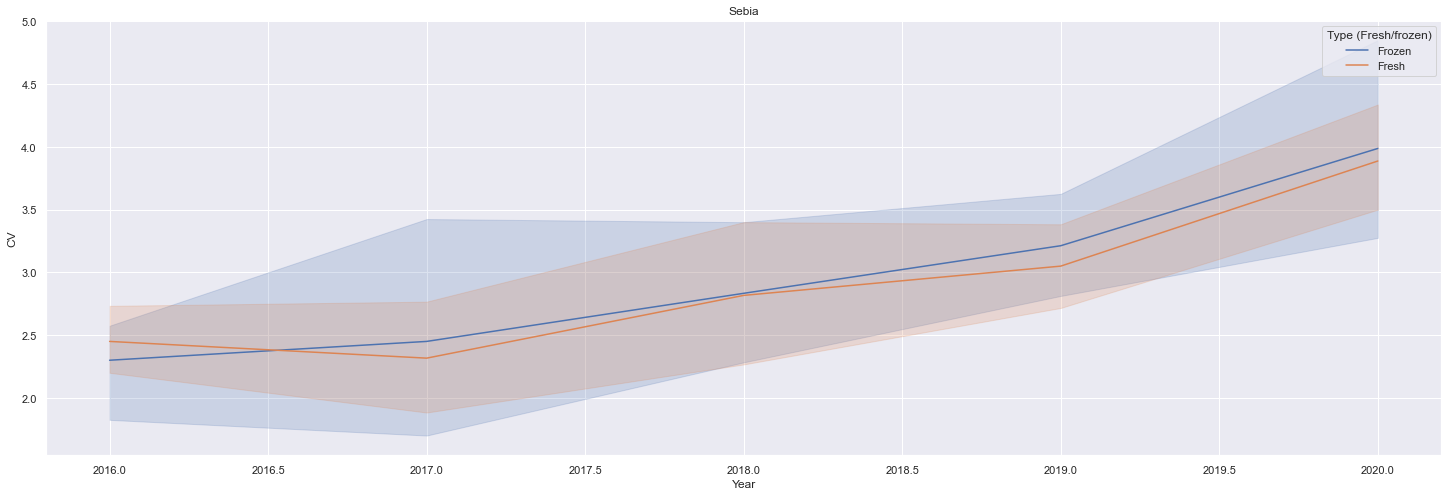

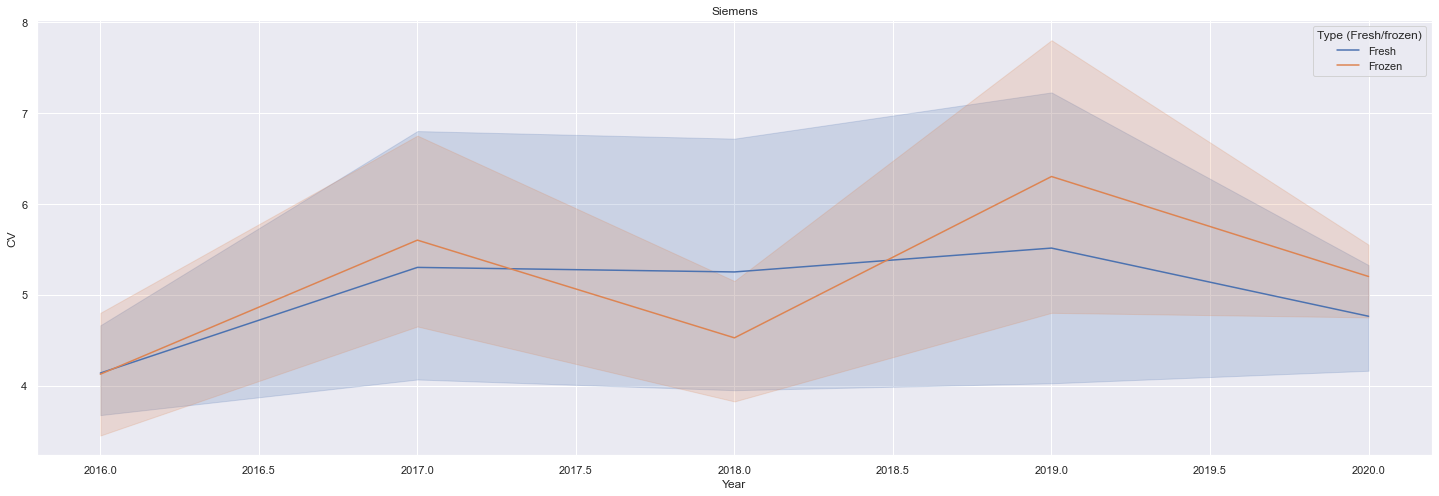

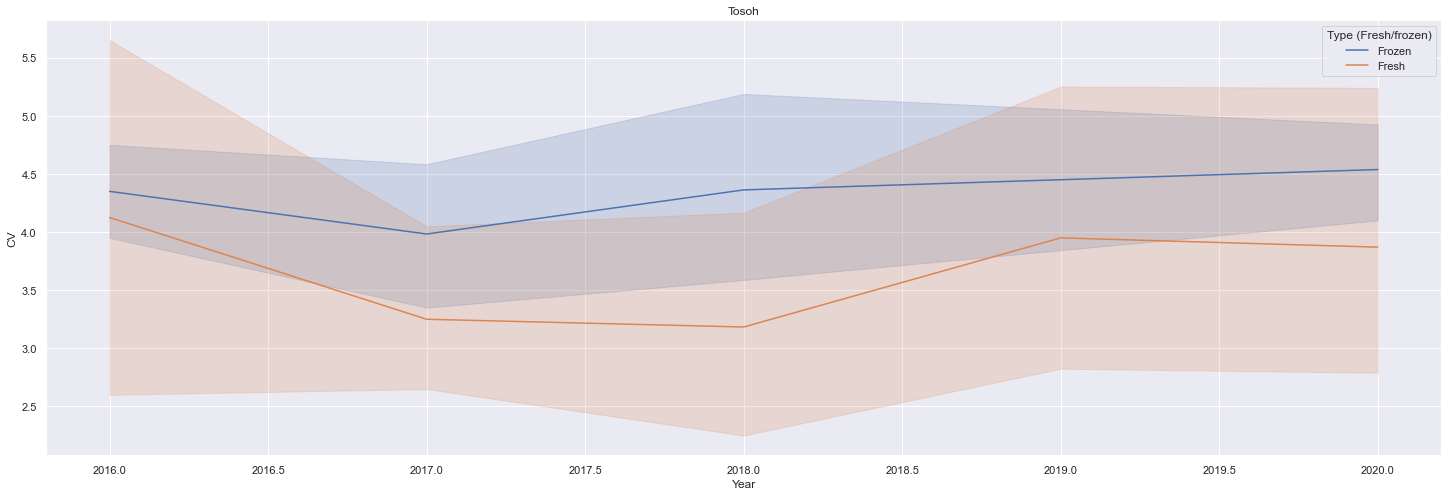

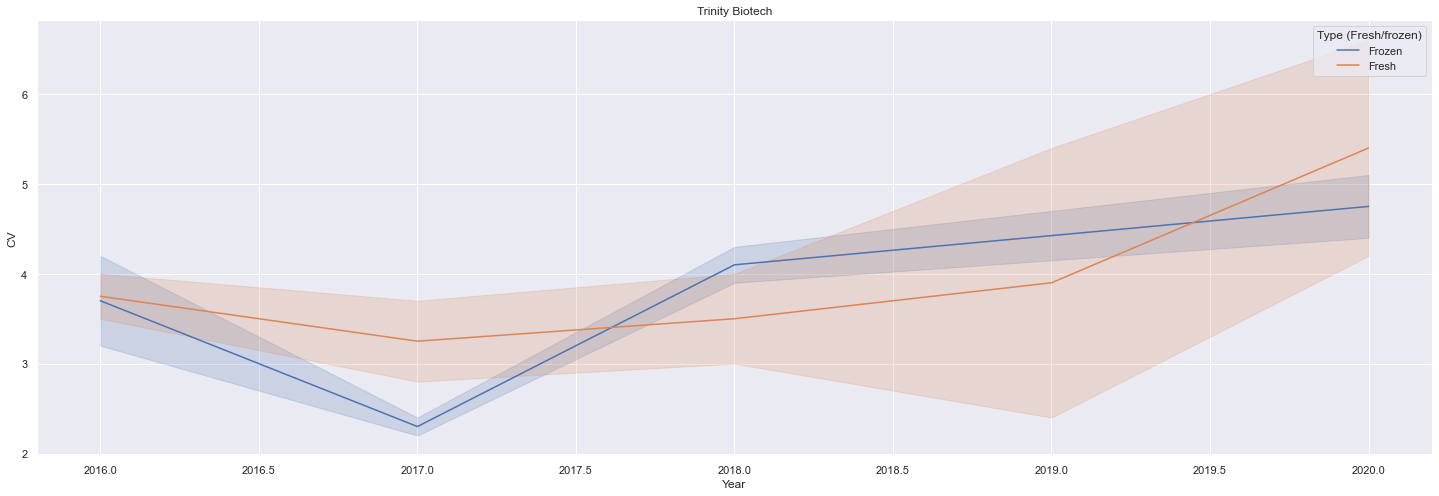

In [7]:
manufacturerGroups = df_manufacturer.groupby('Manufacturer')
# loop manufacturerGroups
for name, data in manufacturerGroups:
    # line plot for CV with seaborn
    # if name == "Abbott":
    sns.set(rc = {'figure.figsize':(25,8)})
    l = sns.lineplot(x='Year', y='CV', hue='Type (Fresh/frozen)', data=data)
    l.set_title(name)
    plt.show()
    

# Conclusie

Zoals je ziet hebben alle merken een frozen en een fresh sample, behalve het merk Alere. Je ziet ook dat er veel verschil is tussen de frozen en de fresh data. Zo is bij de 1 de fresh erg hoog in de CV waarde, maar de andere keer gelijk met de Frozen data. 

Wat wel opmerkelijk is, is dat bij het merk `Trinity Biotech` de Frozen CV waarde erg kort op mekaar ligt tussen de methoden, maar dat voor de Fresh data erg uit elkaar staat. 